<a href="https://colab.research.google.com/github/Aleena24/AML_lab/blob/main/2348503_prg8_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform

In [ ]:
df = pd.read_csv('/content/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

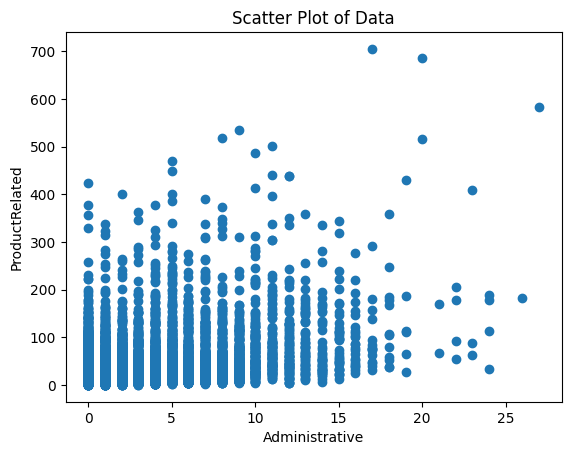

In [ ]:
plt.scatter(x=df['Administrative'], y=df['ProductRelated'])
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.title('Scatter Plot of Data')
plt.show()

In [ ]:
col = ['Administrative','ProductRelated']

<h1><b>Elbow Method<b><h1>

inertia = sum of squared error (sse)

In [ ]:
sse = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=42)
  kmeans.fit(df[col])
  sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Elbow Curve

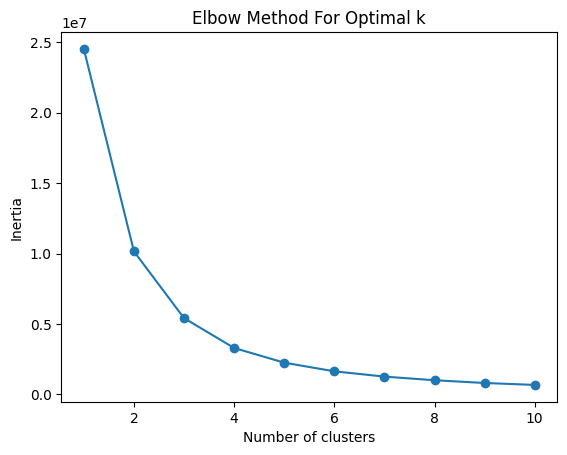

In [ ]:
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

the point where the inertia(sse) starts to decrease at a slower rate, forming an elbow is the no. of clusters to be formed. So, here according to the figure the no. of clusters is :<b><h3>8<h3><b>

<h1><b>K-Means Clustering<h1><b>

In [ ]:
optimal_k = int(input("Enter the optimal number of clusters: "))

Enter the optimal number of clusters: 8


In [ ]:
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=2)
kmeans_optimal.fit(df[col])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=2)

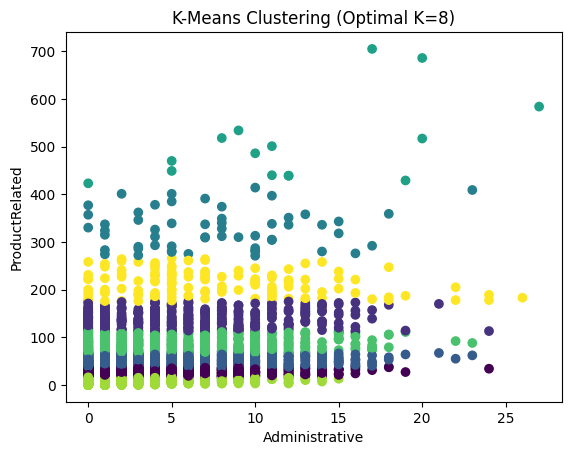

In [ ]:
df['KMeans_Optimal'] = kmeans_optimal.labels_

plt.scatter(x=df['Administrative'], y=df['ProductRelated'], c=df['KMeans_Optimal'], cmap='viridis')
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.title(f'K-Means Clustering (Optimal K={optimal_k})')
plt.show()

# **Silhouette score**

In [ ]:
sil_avg = silhouette_score(df[col], kmeans_optimal.labels_)
print('Silhouette Score : ',sil_avg)

Silhouette Score :  0.5462969897552381


## **Hierarchical Clustering**

In [ ]:
dsh = StandardScaler().fit_transform(df[col])
linkage_matrix = linkage(dsh, method='ward')

# dendrogram plotting

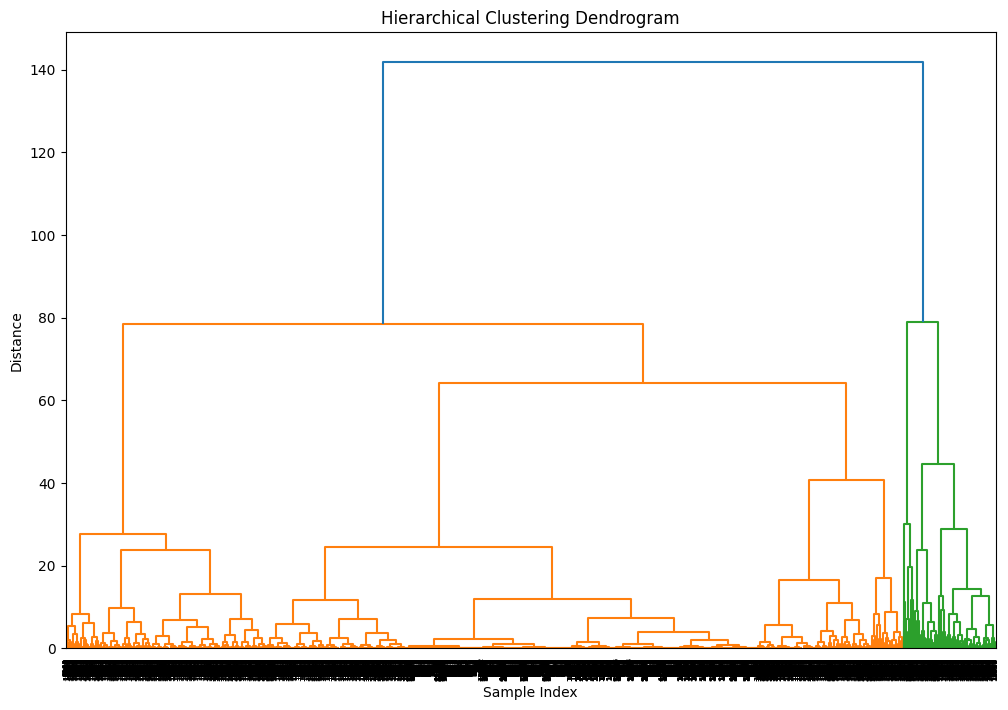

In [ ]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
opt_clus = int(input("Enter the optimal number of clusters for Hierarchical clustering: "))

Enter the optimal number of clusters for Hierarchical clustering: 6


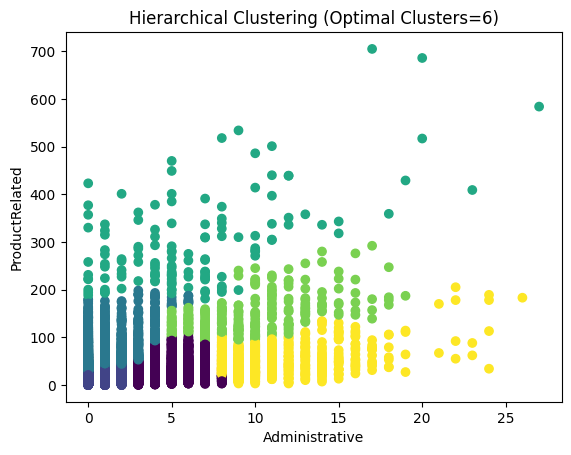

In [ ]:
hierarchical_clusters = fcluster(linkage_matrix, opt_clus, criterion='maxclust')
df['Hierarchical_Clusters'] = hierarchical_clusters

plt.scatter(x=df['Administrative'], y=df['ProductRelated'], c=df['Hierarchical_Clusters'], cmap='viridis')
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.title(f'Hierarchical Clustering (Optimal Clusters={opt_clus})')
plt.show()

In [42]:
pairwise_distances = pdist(StandardScaler().fit_transform(df[col]))
pairwise_distances_square = squareform(pairwise_distances)

if np.isnan(pairwise_distances_square).any():
    raise ValueError("Pairwise distances contain missing values. Handle or remove missing values before proceeding.")

if len(hierarchical_clusters) != len(pairwise_distances_square):
    raise ValueError("Inconsistent numbers of samples between hierarchical_clusters and pairwise_distances_square.")

sah = silhouette_score(pairwise_distances_square, hierarchical_clusters)

print('Silhouette Score for Hierarchical Clustering: ',sah)

Silhouette Score for Hierarchical Clustering:  0.4493826317228773
